In [1]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import pandas as pd
import requests
import os
import lxml.html as lh

Cargamos Todos los datos 

In [2]:
#VIH
url = 'https://www.indexmundi.com/map/?v=35&l=es'
html = requests.get(url).content
VIH = pd.read_html(html)[2]

In [3]:
#Birth_rate
url = 'https://www.indexmundi.com/map/?t=0&v=25&r=xx&l=en'
html = requests.get(url).content
Birth_rate = pd.read_html(html)[2]

In [4]:
path_ll_18 = '/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/Semana2/Tareas/dato_temperaturas_lluvia/201801010000Lluv.csv'
path_Mx_18 = '/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/Semana2/Tareas/dato_temperaturas_lluvia/201801010000TMax.csv'
path_Mm_18 = '/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/Semana2/Tareas/dato_temperaturas_lluvia/201801010000TMin.csv'
path_Md_18 = '/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/Semana2/Tareas/dato_temperaturas_lluvia/201801010000TMed.csv'
path_ll_19 = '/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/Semana2/Tareas/dato_temperaturas_lluvia/201905010000Lluv.csv'
path_Mx_19 = '/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/Semana2/Tareas/dato_temperaturas_lluvia/201901010000TMax.csv'
path_Mm_19 = '/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/Semana2/Tareas/dato_temperaturas_lluvia/201901010000TMin.csv'
path_Md_19 = '/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/Semana2/Tareas/dato_temperaturas_lluvia/201901010000TMed.csv'

In [5]:
lluvias_2018 = pd.read_csv(path_ll_18,encoding='latin-1')
Maxima_2018 = pd.read_csv(path_Mx_18,encoding='latin-1')
Minima_2018 = pd.read_csv(path_Mm_18,encoding='latin-1')
Media_2018 = pd.read_csv(path_Md_18,encoding='latin-1')
lluvias_2018 = lluvias_2018.rename(columns={'LON':'Lon','LAT':'Lat','ESTADO':'Edo','CLAVE_SIH':'Clave','NOMBRE':'Est','ENE':'Ene/18'}) 
lluvias_2019 = pd.read_csv(path_ll_19,encoding='latin-1')
Maxima_2019 = pd.read_csv(path_Mx_19,encoding='latin-1')
Minima_2019 = pd.read_csv(path_Mm_19,encoding='latin-1')
Media_2019 = pd.read_csv(path_Md_19,encoding='latin-1')
lluvias_2019 = lluvias_2019.rename(columns={'LON':'Lon','LAT':'Lat','EDO':'Edo','CLAVE_SIH':'Clave','NOMBRE':'Est','MAY':'May/19'})

In [6]:
#Combinamos las tablas en una sola base de datos:
T_2018 = pd.merge(pd.merge(Media_2018,Maxima_2018),Minima_2018)
T_2019 = pd.merge(pd.merge(Media_2019,Maxima_2019),Minima_2019)
Temperatura = pd.concat([T_2018, T_2019], keys=['2018', '2019'],sort=False)[['Lon', 'Lat', 'Edo', 'Clave', 'Est', 'Tmed','Tmax','Tmin']]

In [7]:
lluvias = pd.merge(lluvias_2018,lluvias_2019)

In [8]:
#Datos de mancahas solares
path_sp = '/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/Semana2/Tareas/sunspots.txt'

In [9]:
sunspots = np.loadtxt(path_sp,skiprows=4, unpack=True)

# Simple Line Plots

In [10]:
year, num= np.reshape(sunspots[::2],(1,300))[0],np.reshape(sunspots[1::2],(1,300))[0]

(0.0, 190.2)

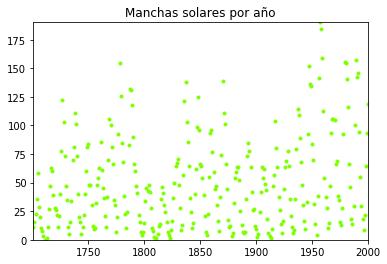

In [11]:
plt.plot(year,num,'.',color='chartreuse')
plt.title("Manchas solares por año")
plt.xlim(np.min(year),np.max(year))
plt.ylim(np.min(num),np.max(num))

In [12]:
x = np.arange(-1,1,0.1)
y = np.exp(-x**2)

Text(0.5,1,'Exponencial')

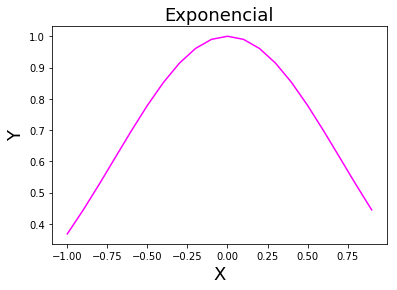

In [13]:
plt.figure()
plt.plot(x,y,color = 'magenta')
plt.xlabel('X',fontsize  =18)
plt.ylabel('Y',fontsize  =18)
plt.title('Exponencial',fontsize  =18)

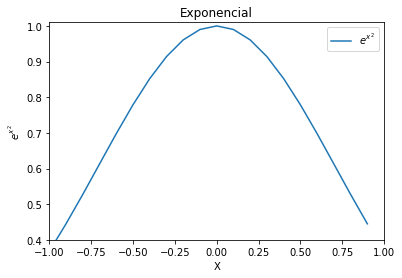

In [14]:
ax = plt.axes()
ax.plot(x,y,label='$e^{x^{2}}$')
ax.set(xlim=(-1,1), ylim=(0.4, 1.01),xlabel='X', ylabel='$e^{x^{2}}$',title='Exponencial')
plt.legend();

# Simple Scatter Plots

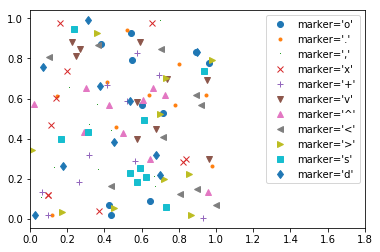

In [15]:
#Copiey pego para ver como funciona
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(10), rng.rand(10), marker,label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

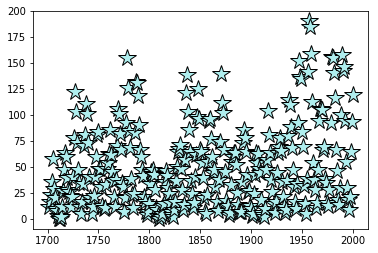

In [16]:
#Muestro los puntos de las manchas solares con más estilo:
plt.plot(year, num, '*',
         markersize=18, #tamaño de los puntos 
         markerfacecolor='paleturquoise', #color de relleno
         markeredgecolor='k', # color del contorno
         markeredgewidth=1); # Grosor del contorno 

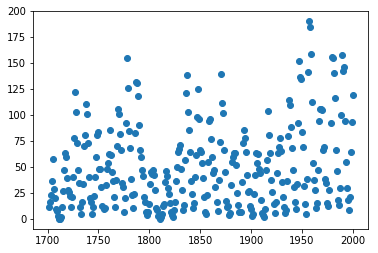

In [17]:
#Ahora lo hacemos con plt.scatter
plt.scatter(year,num);

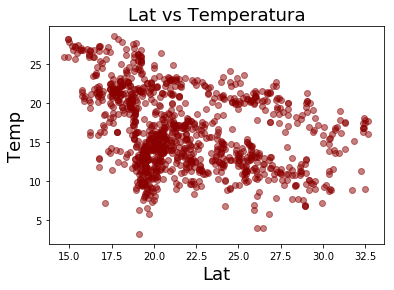

In [18]:
# Veoms Como varia la teperatura con la latitud
plt.scatter(np.array(Temperatura['Lat'][:'2018']),np.array(Temperatura['Tmed'][:'2018']),
            marker='o',
            color = 'darkred', 
            alpha = 0.5)
plt.title('Lat vs Temperatura',fontsize  =18)
plt.xlabel('Lat', fontsize = 18)
plt.ylabel('Temp',fontsize = 18);

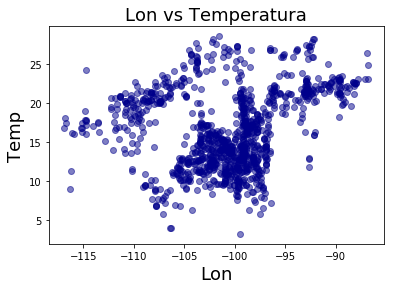

In [19]:
# Veoms Como varia la teperatura con la Longitud
plt.scatter(np.array(Temperatura['Lon'][:'2018']),np.array(Temperatura['Tmed'][:'2018']),
            marker='o',
            color = 'darkblue', 
            alpha = 0.5)
plt.title('Lon vs Temperatura',fontsize  =18)
plt.xlabel('Lon', fontsize = 18)
plt.ylabel('Temp',fontsize = 18);

# Visualizing Errors

In [20]:
 rnd = np.random.RandomState()

In [21]:
err_y = rnd.rand(len(y))*0.1 #producimos el error de Y en forma random

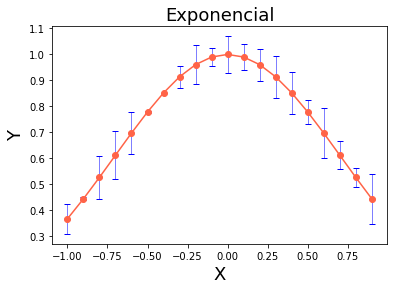

In [22]:
plt.errorbar(x, y, yerr=err_y, fmt='o-', color = 'tomato',
            ecolor = 'blue',
            elinewidth = 0.5,
            capsize = 3)
plt.xlabel('X',fontsize  =18)
plt.ylabel('Y',fontsize  =18)
plt.title('Exponencial',fontsize  =18);

# Density and Contour Plots

In [23]:
def f(x,y):
    return np.sin(np.abs(y)**x)*np.cos(np.abs(x)**y)

In [24]:
x_1 = np.linspace(-np.pi,np.pi,100)
y_1 = np.linspace(-3*np.pi/2, 3*np.pi/2,100)
X, Y = np.meshgrid(x_1, y_1)

In [25]:
Z = f(X,Y)

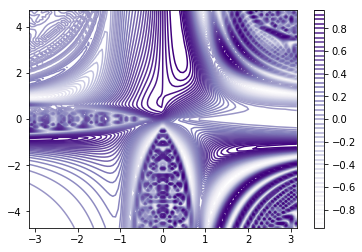

In [26]:
# Con Controur
plt.contour(X, Y, Z,
            50, #espesificar contas lineas se crearan
            cmap='Purples') #color de las lineas
plt.colorbar();

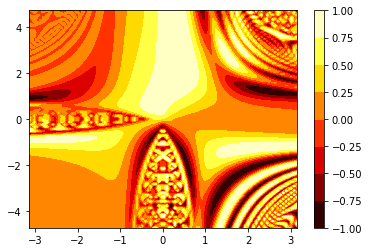

In [27]:
# Con Controurf
plt.contourf(X, Y, Z,
            cmap='hot') #color de las lineas
plt.colorbar();

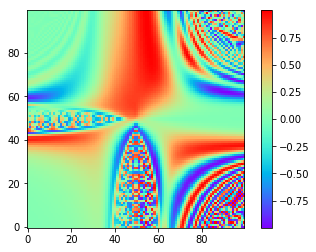

In [28]:
# Con imshow
plt.imshow(Z,origin='lower',cmap='rainbow')
plt.colorbar()
plt.axis(aspect='imagen');

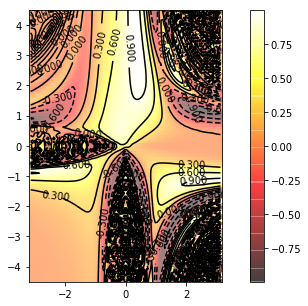

In [29]:
#Podemos convinar las tecnicas para graficar
plt.figure(figsize=(10,5))
graf = plt.contour(X, Y, Z, 6, colors = 'black') #Los limites que aparescan los ponemos como limites en imshow
plt.clabel(graf, inline=True, fontsize=10)
plt.imshow(Z,extent=[-3.2,3.2, -4.5, 4.5],
           origin='lower', #Ponemos lower de lo contrario la gráfica saldrá invertida
           cmap='hot', 
           alpha=0.5) # degradado
plt.colorbar();

# Histograms, Binnings, and Density

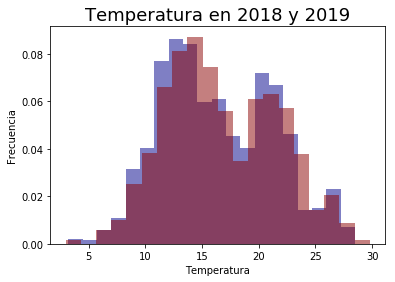

In [30]:
#Histograma de temperaturas medias de 2018
plt.hist(np.array(Temperatura['Tmed'][:'2018']),
         bins=20, #escojemos los bins (ancho de las barras)
         density = True, #Normalizamos
         alpha=0.5, #degradado
         color='darkblue')
#Histograma de temperaturas medias de 2019
plt.hist(np.array(Temperatura['Tmed'][:'2019']),
         bins=20, #escojemos los bins (ancho de las barras)
         density = True, #Normalizamos
         alpha=0.5, #degradado
         color='darkred')
plt.title('Temperatura en 2018 y 2019',fontsize =18)
plt.xlabel('Temperatura')
plt.ylabel('Frecuencia');

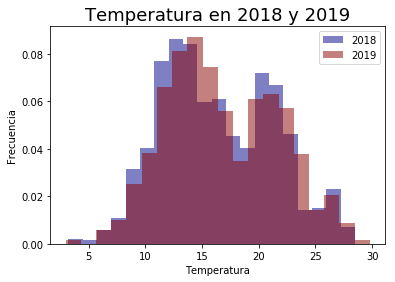

In [31]:
#podemos hacerlo mas conciso con dict y caracteristicas en comun
tun = dict(alpha=0.5, density=True, bins=20)

plt.hist(np.array(Temperatura['Tmed'][:'2018']),color='darkblue',**tun,label='2018')
plt.hist(np.array(Temperatura['Tmed'][:'2019']),color='darkred',**tun,label='2019')
plt.title('Temperatura en 2018 y 2019',fontsize  =18)
plt.xlabel('Temperatura')
plt.ylabel('Frecuencia')
plt.legend();

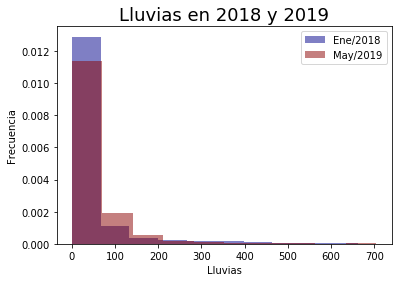

In [32]:
#podemos hacerlo mas conciso con dict y caracteristicas en comun
tun = dict(alpha=0.5, density=True, bins=10)

plt.hist(np.array(lluvias['Ene/18']),color='darkblue',**tun,label='Ene/2018')
plt.hist(np.array(lluvias['May/19']),color='darkred',**tun,label='May/2019')
plt.title('Lluvias en 2018 y 2019',fontsize  =18)
plt.xlabel('Lluvias')
plt.ylabel('Frecuencia')
plt.legend();

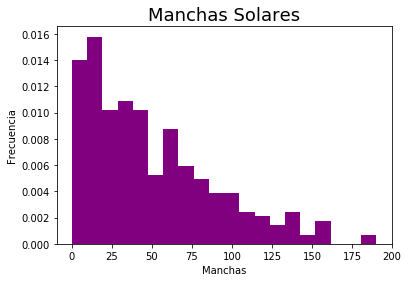

In [33]:
#Histograma de lluvias
plt.hist(num, density=True, bins=20, color='purple')
plt.title('Manchas Solares',fontsize  =18)
plt.xlabel('Manchas')
plt.ylabel('Frecuencia');

In [34]:
#Para solo obtener los dato del Histograma (Frecuecia por cada bin)
F,b = np.histogram(num,bins=20)
print(F) 
print(b) #separación de los bins

[40 45 29 31 29 15 25 17 14 11 11  7  6  4  7  2  5  0  0  2]
[  0.     9.51  19.02  28.53  38.04  47.55  57.06  66.57  76.08  85.59
  95.1  104.61 114.12 123.63 133.14 142.65 152.16 161.67 171.18 180.69
 190.2 ]


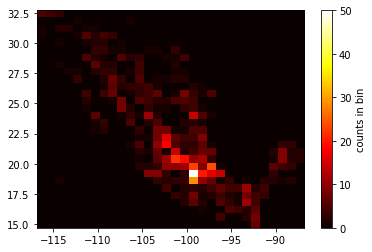

In [35]:
#Con un istograma Podemos ver los logares donde se hicieron mas mediciones en la temperatura
plt.hist2d(np.array(Temperatura['Lon'][:'2018']), np.array(Temperatura['Lat'][:'2018']), bins=30, cmap='hot')
cb = plt.colorbar()
cb.set_label('counts in bin');

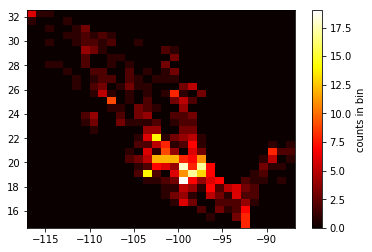

In [36]:
#Con un istograma Podemos ver los logares donde se hicieron mas mediciones en las lluvias
plt.hist2d(np.array(lluvias['Lon']), np.array(lluvias['Lat']), bins=30, cmap='hot')
cb = plt.colorbar()
cb.set_label('counts in bin');

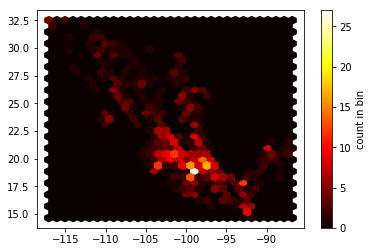

In [37]:
plt.hexbin(np.array(lluvias['Lon']), np.array(lluvias['Lat']), gridsize=30, cmap='hot')
plt.colorbar(label='count in bin');

# Customizing Plot Legends

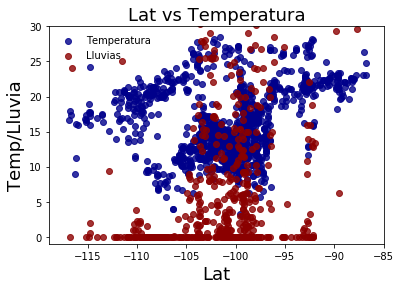

In [38]:
# Vemos etiquetas de forma sencilla
plt.scatter(np.array(Temperatura['Lon'][:'2018']),np.array(Temperatura['Tmed'][:'2018']), marker='o', color = 'darkblue', alpha = 0.8,label = 'Temperatura')
plt.scatter(np.array(lluvias['Lon']),np.array(lluvias['Ene/18']), marker='o', color = 'darkred',  alpha = 0.8, label = 'Lluvias')
plt.title('Lat vs Temperatura',fontsize  =18)
plt.xlabel('Lat', fontsize = 18)
plt.ylabel('Temp/Lluvia',fontsize = 18)
plt.ylim(-1,30)
plt.legend(loc='upper left', frameon=False);

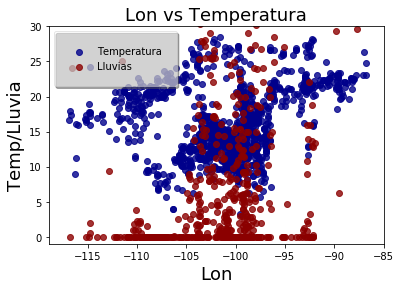

In [39]:
#Aplicamos formato a las etiquetas
plt.scatter(np.array(Temperatura['Lon'][:'2018']),np.array(Temperatura['Tmed'][:'2018']), marker='o', color = 'darkblue', alpha = 0.8,label = 'Temperatura')
plt.scatter(np.array(lluvias['Lon']),np.array(lluvias['Ene/18']), marker='o', color = 'darkred',  alpha = 0.8, label = 'Lluvias')
plt.title('Lon vs Temperatura',fontsize  =18)
plt.xlabel('Lon', fontsize = 18)
plt.ylabel('Temp/Lluvia',fontsize = 18)
plt.ylim(-1,30)
plt.legend(loc='upper left', 
           fancybox=True, #Cuadro bonito 
           framealpha=0.5, #degradado
           shadow=True, 
           borderpad=1.5); #Tamaño

In [40]:
#Agregamos una columna asignando un número a cada estado para despues graficarlos de distinto color
Temperatura['n'] = 0
guar = []
i = 1
for mark in Temperatura['Edo']:
    if mark in guar:
        pass
    else:
        Temperatura.loc[(Temperatura['Edo']== mark),'n'] = i
        i = i+1
    guar.append(mark)

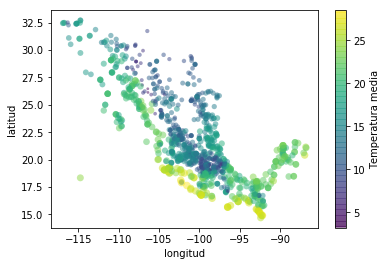

In [41]:
plt.scatter(np.array(Temperatura['Lon'][:'2018']), np.array(Temperatura['Lat'][:'2018']), label=None,
            c=np.array(Temperatura['Tmed'][:'2018']), cmap='viridis',
            s=2*np.array(Temperatura['Tmed'][:'2018']), linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('longitud')
plt.ylabel('latitud')
plt.colorbar(label='Temperatura media');

In [42]:
Temperatura['n'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

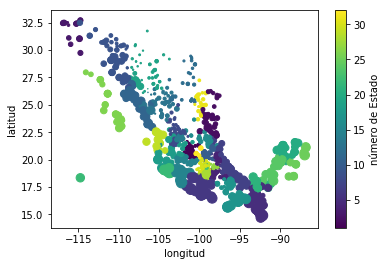

In [43]:
plt.scatter(np.array(Temperatura['Lon'][:'2018']), np.array(Temperatura['Lat'][:'2018']), label=None,
            c=np.array(Temperatura['n'][:'2018']), cmap='viridis',
            s = 0.005*np.power(np.array(Temperatura['Tmed'][:'2018']),3),
            alpha=1)
plt.axis(aspect='equal')
plt.xlabel('longitud')
plt.ylabel('latitud')
plt.colorbar(label='número de Estado');

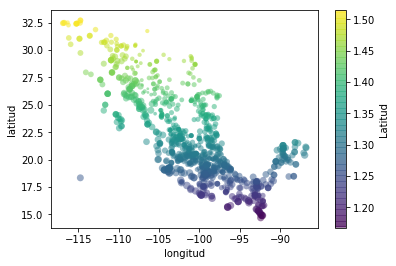

In [44]:
plt.scatter(np.array(Temperatura['Lon'][:'2018']), np.array(Temperatura['Lat'][:'2018']), label=None,
            c=np.log10(np.abs(np.array(Temperatura['Lat'][:'2018']))), cmap='viridis',
            s=2*np.array(Temperatura['Tmed'][:'2018']), linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('longitud')
plt.ylabel('latitud')
plt.colorbar(label='Latitud');

In [154]:
Temperatura.head()

Lon    Lat    Edo  Clave                                  Est  \
2018 0 -101.51  20.43    GTO  ABSGJ                              ABASOLO   
     1  -98.38  24.06  TAMPS  ABSTP                              ABASOLO   
     2 -116.90  32.44     BC  ALRBN                ABELARDO L. RODRIGUEZ   
     3  -97.97  20.17    PUE  ACJPB  ACAJETE                           *   
     4  -92.80  16.55   CHIS  ACACP                                ACALA   

        Tmed  Tmax  Tmin  n  
2018 0  16.2  24.9   7.5  1  
     1  15.0  22.1   7.9  2  
     2  16.7  23.3  10.2  3  
     3  12.3  22.2   2.4  4  
     4  21.2  28.5  13.9  5

# Customizing Colorbars

In [156]:
GTO_T = Temperatura[:'2018'][(Temperatura['Edo'][:'2018'] == 'GTO')].loc[:,'Tmed'].values
GTO_L = Temperatura[:'2018'][(Temperatura['Edo'][:'2018'] == 'GTO')].loc[:,'Lon'].values
GTO_N = Temperatura[:'2018'][(Temperatura['Edo'][:'2018'] == 'GTO')].loc[:,'n'].values
JAL_T = Temperatura[:'2018'][(Temperatura['Edo'][:'2018'] == 'JAL')].loc[:,'Tmed'].values
JAL_L = Temperatura[:'2018'][(Temperatura['Edo'][:'2018'] == 'JAL')].loc[:,'Lon'].values
JAL_N = Temperatura[:'2018'][(Temperatura['Edo'][:'2018'] == 'JAL')].loc[:,'n'].values
AGS_T = Temperatura[:'2018'][(Temperatura['Edo'][:'2018'] == 'AGS')].loc[:,'Tmed'].values
AGS_L = Temperatura[:'2018'][(Temperatura['Edo'][:'2018'] == 'AGS')].loc[:,'Lon'].values
AGS_N = Temperatura[:'2018'][(Temperatura['Edo'][:'2018'] == 'AGS')].loc[:,'n'].values
QRO_T = Temperatura[:'2018'][(Temperatura['Edo'][:'2018'] == 'QRO')].loc[:,'Tmed'].values
QRO_L = Temperatura[:'2018'][(Temperatura['Edo'][:'2018'] == 'QRO')].loc[:,'Lon'].values
QRO_N = Temperatura[:'2018'][(Temperatura['Edo'][:'2018'] == 'QRO')].loc[:,'n'].values

In [157]:
Tem_edos = np.append(GTO_L ,np.append(JAL_L,np.append(AGS_L,QRO_L)))
Lon_edos = np.append(GTO_T ,np.append(JAL_T,np.append(AGS_T,QRO_T)))
N_edos = np.append(GTO_N ,np.append(JAL_N,np.append(AGS_N,QRO_N)))

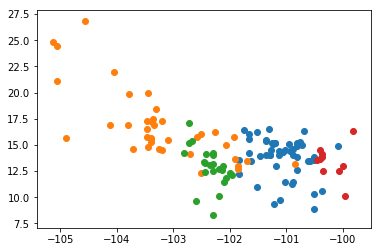

In [119]:
plt.scatter(GTO_L,GTO_T)
plt.scatter(JAL_L,JAL_T)
plt.scatter(AGS_L,AGS_T)
plt.scatter(QRO_L,QRO_T)

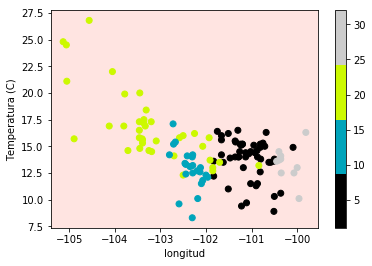

In [171]:
plt.axes(facecolor='mistyrose')
plt.scatter(Tem_edos,Lon_edos,c=N_edos,cmap=plt.cm.get_cmap('nipy_spectral', 4))
plt.colorbar()
plt.xlabel('longitud')
plt.ylabel('Temperatura (C)');

# Multiple Subplots

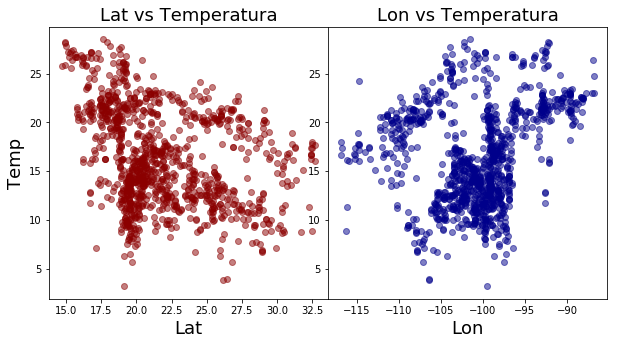

In [45]:
#Jugamos con los subplots
fig = plt.figure(figsize=(10,5))
fig.subplots_adjust(hspace=1, wspace=0)
plt.subplot(1,2,1)
plt.scatter(np.array(Temperatura['Lat'][:'2018']),np.array(Temperatura['Tmed'][:'2018']),
            marker='o',
            color = 'darkred', 
            alpha = 0.5)
plt.title('Lat vs Temperatura',fontsize  =18)
plt.xlabel('Lat', fontsize = 18)
plt.ylabel('Temp',fontsize = 18)
plt.subplot(1,2,2)
plt.scatter(np.array(Temperatura['Lon'][:'2018']),np.array(Temperatura['Tmed'][:'2018']),
            marker='o',
            color = 'darkblue', 
            alpha = 0.5)
plt.title('Lon vs Temperatura',fontsize  =18)
plt.xlabel('Lon', fontsize = 18)
plt.show()

In [46]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

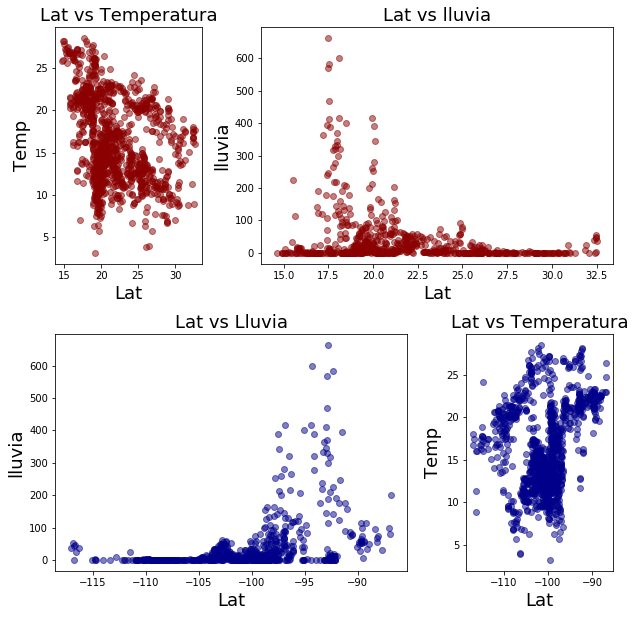

In [47]:
fig = plt.figure(figsize=(10,10))
#fig.subplots_adjust(hspace=0, wspace=0)
plt.subplot(grid[0, 0])
plt.scatter(np.array(Temperatura['Lat'][:'2018']),np.array(Temperatura['Tmed'][:'2018']),
            marker='o',
            color = 'darkred', 
            alpha = 0.5)
plt.title('Lat vs Temperatura',fontsize  =18)
plt.xlabel('Lat', fontsize = 18)
plt.ylabel('Temp',fontsize = 18)
plt.subplot(grid[0, 1:])
plt.scatter(np.array(lluvias['Lat']),np.array(lluvias['Ene/18']),
            marker='o',
            color = 'darkred', 
            alpha = 0.5)
plt.title('Lat vs lluvia',fontsize  =18)
plt.xlabel('Lat', fontsize = 18)
plt.ylabel('lluvia',fontsize = 18)
plt.subplot(grid[1, :2])
plt.scatter(np.array(lluvias['Lon']),np.array(lluvias['Ene/18']),
            marker='o',
            color = 'darkblue', 
            alpha = 0.5)
plt.title('Lat vs Lluvia',fontsize  =18)
plt.xlabel('Lat', fontsize = 18)
plt.ylabel('lluvia',fontsize = 18)
plt.subplot(grid[1, 2])
plt.scatter(np.array(Temperatura['Lon'][:'2018']),np.array(Temperatura['Tmed'][:'2018']),
            marker='o',
            color = 'darkblue', 
            alpha = 0.5)
plt.title('Lat vs Temperatura',fontsize  =18)
plt.xlabel('Lat', fontsize = 18)
plt.ylabel('Temp',fontsize = 18);

# Text and Annotation

In [48]:
EDO = Temperatura.groupby('Edo')['Tmed'].mean().keys().values
Tmed_EDO = Temperatura.groupby('Edo')['Tmed'].mean().values

In [49]:
manchas = pd.DataFrame({'Año': year, 'Num': num})

In [50]:
np.max(manchas['Num'])

190.2

In [51]:
Manchas_Max = manchas.loc[manchas['Num'] == np.max(manchas['Num'])]

In [52]:
manchas['Año'][48]

1749.0

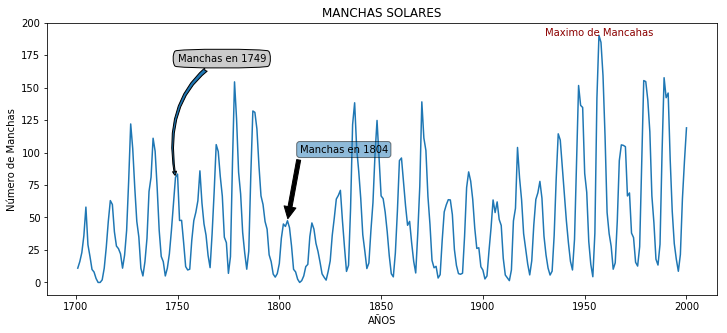

In [53]:
fig, ax = plt.subplots(figsize=(12, 5))
plt.plot(manchas['Año'],manchas['Num'])
plt.text(Manchas_Max['Año'], #lugar en x
         Manchas_Max['Num'], #lugar en y
         "Maximo de Mancahas", #Etiqueta
          ha='center',size=10, color='darkred')

plt.annotate('Manchas en 1804', 
             xy=(manchas['Año'][103],manchas['Num'][103]), 
             xytext=(1810,100),
             bbox=dict(boxstyle="round", alpha=0.5),
             arrowprops=dict(facecolor='black', shrink=0.03))

plt.annotate('Manchas en 1749', 
            xy=(manchas['Año'][48],manchas['Num'][48]), 
            xytext=(1750,170),
             bbox=dict(boxstyle="round4,pad=.5", fc="0.8"),
            arrowprops=dict(arrowstyle="fancy",
                            connectionstyle="angle3,angleA=30,angleB=-80"));

plt.xlabel('AÑOS')
plt.ylabel('Número de Manchas')
plt.title('MANCHAS SOLARES');

# Customizing Ticks

# Customizing Matplotlib: Configurations and Stylesheets

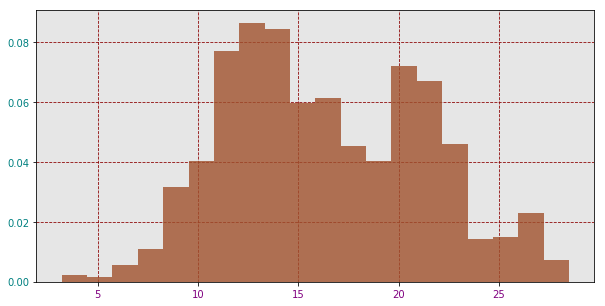

In [54]:
plt.subplots(figsize=(10, 5))
# Color del plano
ax = plt.axes(facecolor='#E6E6E6')
ax.set_axisbelow(True)
# Cuadricula
plt.grid(color='darkred', linestyle='--')

#Color de las etiquetas de los ejes 
#ax.tick_params(colors='gray', direction='out') #para los dos al mismo tiempo
    #Para cambiar de un color diferente a cada etiqueta de caja eje 
for tick in ax.get_xticklabels():
    tick.set_color('purple')

for tick in ax.get_yticklabels():
    tick.set_color('teal')

plt.hist(np.array(Temperatura['Tmed'][:'2018']),
         bins=20, #escojemos los bins (ancho de las barras)
         density = True, #Normalizamos
         alpha=0.8, #degradado
         color='sienna');

### Defaults

In [55]:
from matplotlib import cycler

In [56]:
#cambiamos el estilo de las gráficas con plt.rc
colors = cycler('color', ['chocolate', 'darkgreen', 'gold','olive', 'purple','orange','lime'])
plt.rc('axes', 
       facecolor='thistle', 
       edgecolor='none',
       axisbelow=True,
       grid=True, 
       prop_cycle=colors)

plt.rc('grid', color='red', linestyle='--')

plt.rc('xtick', direction='out', color='purple')
plt.rc('ytick', direction='out', color='navy')

plt.rc('patch', edgecolor='orange')

plt.rc('lines', linewidth=3.2)

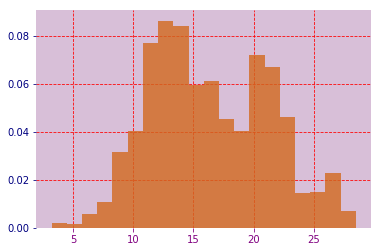

In [57]:
plt.hist(np.array(Temperatura['Tmed'][:'2018']),
         bins=20, #escojemos los bins (ancho de las barras)
         density = True, #Normalizamos
         alpha=0.8); #degradado

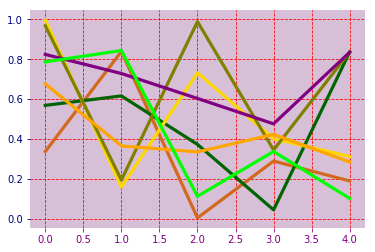

In [58]:
for i in range(7):
    plt.plot(np.random.rand(5))

In [59]:
def his_lin(x):
    plt.figure(figsize=(11, 8))
    plt.subplot(2,2,1)
    plt.hist(np.array(x['Tmed'][:'2018']),
         bins=20, #escojemos los bins (ancho de las barras)
         density = True, #Normalizamos
         alpha=0.8); #degradado
    
    plt.subplot(2,2,2)
    for i in range(3):
        plt.plot(np.random.rand(10))
    plt.legend(['a', 'b', 'c'], loc='lower left')

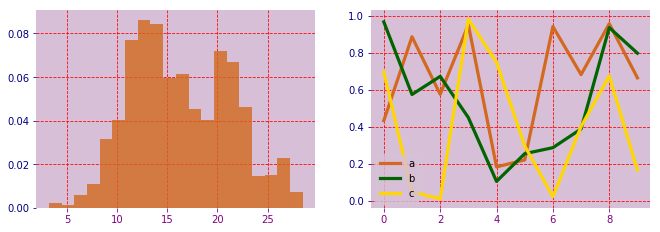

In [60]:
his_lin(Temperatura)

### Tipos de estilos

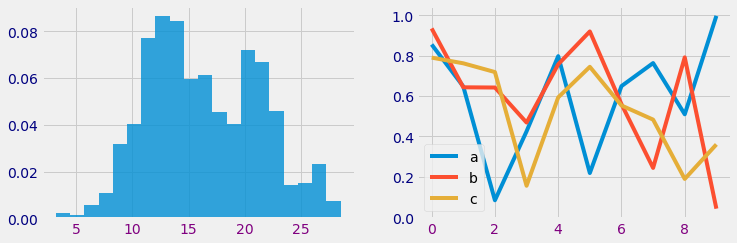

In [61]:
with plt.style.context('fivethirtyeight'):
    his_lin(Temperatura)

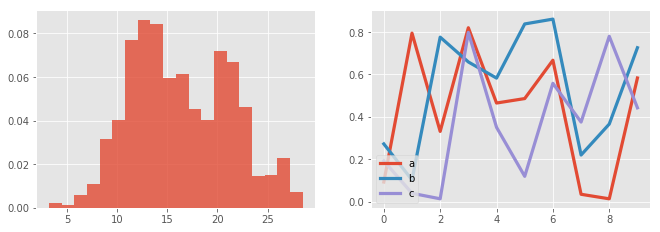

In [62]:
with plt.style.context('ggplot'):
    his_lin(Temperatura)

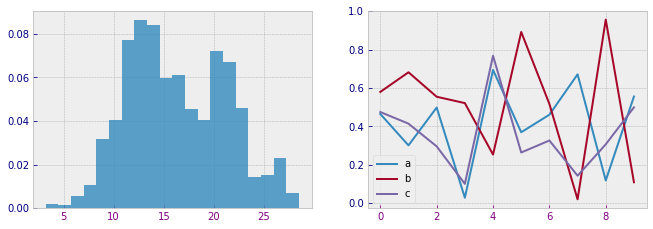

In [63]:
with plt.style.context('bmh'):
    his_lin(Temperatura)

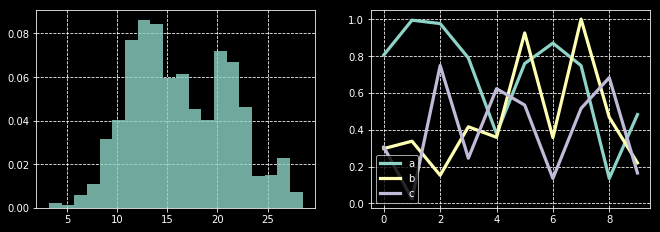

In [64]:
with plt.style.context('dark_background'):
    his_lin(Temperatura)

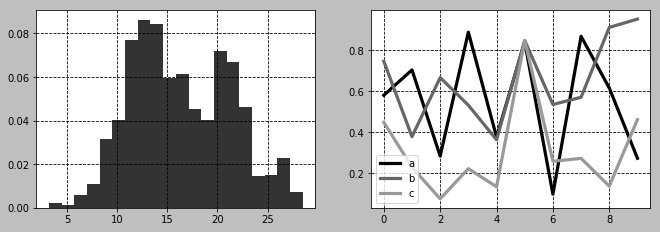

In [65]:
with plt.style.context('grayscale'):
    his_lin(Temperatura)

# Three-Dimensional Plotting in Matplotlib

In [66]:
from mpl_toolkits import mplot3d

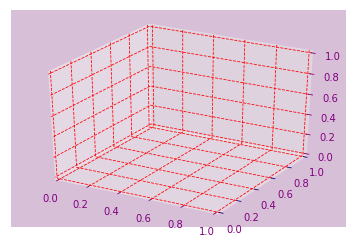

In [67]:
plt.figure()
plt.axes(projection='3d')

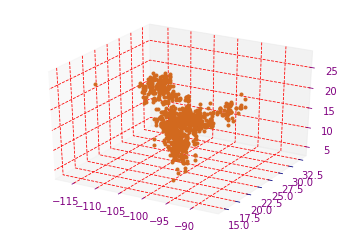

In [68]:
fig_1 = plt.figure()
ax = plt.axes(projection='3d',facecolor='w')
ax.plot3D(np.array(Temperatura['Lon'][:'2018']), np.array(Temperatura['Lat'][:'2018']), np.array(Temperatura['Tmed'][:'2018']),'.')

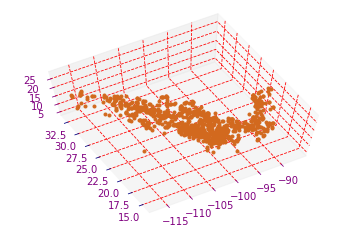

In [69]:
ax.view_init(70, 240) 
fig_1

In [70]:
def f_2(x, y):
    return np.sin(np.sqrt(np.abs(x ** 3 + y )))

x = np.linspace(-np.pi, np.pi, 30)
y = np.linspace(-np.pi, np.pi, 30)

X, Y = np.meshgrid(x,y)
Z = f_2(X, Y)

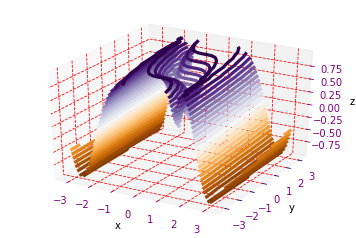

In [71]:
fig = plt.figure()
ax = plt.axes(projection='3d',facecolor='w')
ax.contour3D(X, Y, Z, 30, cmap='PuOr')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

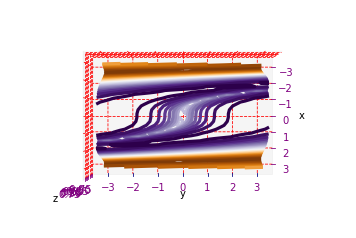

In [72]:
ax.view_init(90, 0)
fig

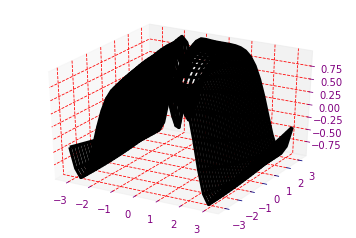

In [73]:
fig = plt.figure()
ax = plt.axes(projection='3d',facecolor='w')
ax.plot_wireframe(X, Y, Z, color='black')

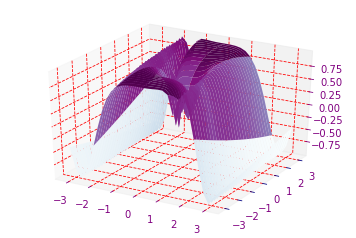

In [74]:
ax = plt.axes(projection='3d',facecolor='w')
ax.plot_surface(X, Y, Z, rstride=1, cstride=5,
                cmap='BuPu', edgecolor='none')

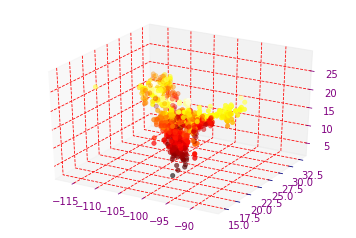

In [75]:
fig_3= plt.figure()
T_x, T_y =np.ravel(np.array(Temperatura['Lon'][:'2018'])), np.ravel(np.array(Temperatura['Lat'][:'2018']))
T_z = np.ravel(np.array(Temperatura['Tmed'][:'2018']))
ax = plt.axes(projection='3d',facecolor='w')
ax.scatter(T_x, T_y, T_z, c=T_z, cmap='hot', linewidth=0.5);



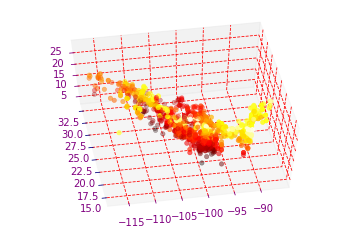

In [76]:
ax.view_init(60, 260) 
fig_3

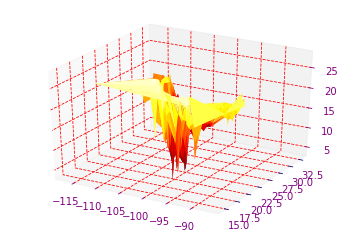

In [77]:
ax = plt.axes(projection='3d',facecolor='w')
ax.plot_trisurf(T_x,T_y, T_z,cmap='hot', edgecolor='none');

In [78]:
from mpl_toolkits.basemap import Basemap

# Visualization with Seaborn

In [79]:
import seaborn as sns

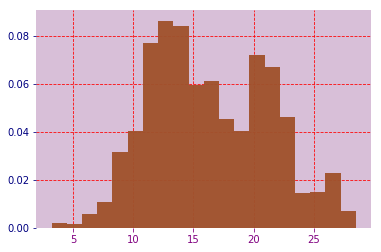

In [80]:
for col in 'xy':
    plt.hist(np.array(Temperatura['Tmed'][:'2018']),
             bins=20, #escojemos los bins (ancho de las barras)
             density = True, #Normalizamos
             alpha=0.8, #degradado
             color='sienna');

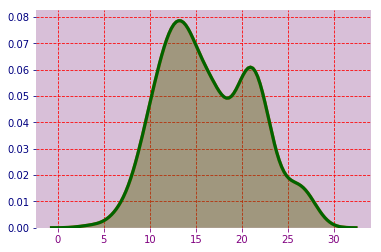

In [81]:
for col in 'xy':
    sns.kdeplot(np.array(Temperatura['Tmed'][:'2018']), shade=True)

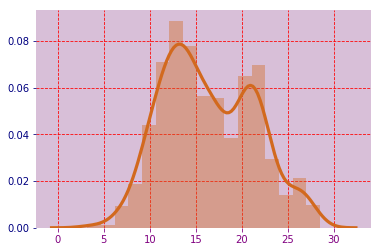

In [82]:
sns.distplot(np.array(Temperatura['Tmed'][:'2018']));

In [83]:
Temperatura.head()

Lon    Lat    Edo  Clave                                  Est  \
2018 0 -101.51  20.43    GTO  ABSGJ                              ABASOLO   
     1  -98.38  24.06  TAMPS  ABSTP                              ABASOLO   
     2 -116.90  32.44     BC  ALRBN                ABELARDO L. RODRIGUEZ   
     3  -97.97  20.17    PUE  ACJPB  ACAJETE                           *   
     4  -92.80  16.55   CHIS  ACACP                                ACALA   

        Tmed  Tmax  Tmin  n  
2018 0  16.2  24.9   7.5  1  
     1  15.0  22.1   7.9  2  
     2  16.7  23.3  10.2  3  
     3  12.3  22.2   2.4  4  
     4  21.2  28.5  13.9  5

In [84]:
#Vemos solo temperatura media, maxima y minima del 2018
Temperatura.loc['2018'].loc[:,'Tmed':'Tmin'].head()

,Tmed,Tmax,Tmin
0,16.2,24.9,7.5
1,15.0,22.1,7.9
2,16.7,23.3,10.2
3,12.3,22.2,2.4
4,21.2,28.5,13.9


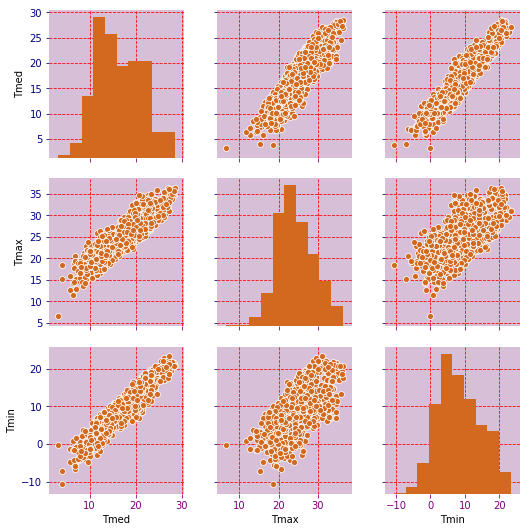

In [85]:
#Graficamos los histogramas de estos datos
sns.pairplot(Temperatura.loc['2018'].loc[:,'Tmed':'Tmin']);